New York city police department is tasked with collection and maintenance of crime data for incidents that occur in New York City public schools. The NYPD has provided this data to the New York City Department of Education (DOE) and DOE has compiled this data by schools and locations for the information of the general public. 

For my study, I chose three data sets that provide information on school safety of schools in NYC. 

First dataset is the 2010-2016 School safety report from NYC open data website. Link to the source:https://data.cityofnewyork.us/Education/2010-2016-School-Safety-Report/qybk-bjjc

Second dataset is the 2016-2017 School safety report from NYC open data website. Link to the source: https://data.cityofnewyork.us/Education/2016-2017-School-Safety-Report/rear-wh5i

Third dataset is the 2017-2018 School safety report from NYC open data website. Link to the source: https://data.cityofnewyork.us/Education/2017-2018-Schools-NYPD-Crime-Data-Report/kwvk-z7i9

I will be using the first dataset to train, second dataset to validate and third dataset to test to predict occurences of crime in schools of NYC. 



A brief description of the datasets: 

First dataset- 

This data set has 34 columns and 6310 rows

Second dataset-

This data set has 33 columns and 2046 rows

Third dataset-

This data set has 25 columns and 1919 rows


This data set has 33 columns and 2046 rows


# Importing required packages

In [1]:
#Importing necessary libraries

import numpy as np
import pandas as pd
import sys
import os
import matplotlib.pyplot as plt
import seaborn as sns
import scipy
import yellowbrick

import warnings
warnings.filterwarnings('ignore')

# Importing train, validation and test CSV files

In [2]:
ssr1 = pd.read_csv("2010_-_2016_School_Safety_Report.csv")
ssr2 = pd.read_csv("2016_-_2017_School_Safety_Report.csv")
ssr3 = pd.read_csv("2017-2018_NYPD_Crime_Data.csv")


# Understanding the structure of data

In [3]:
print("Number of Rows in 2010_-_2016_School_Safety_Report.csv: ", len(ssr1.axes[0]))
print("Number of Columns in 2010_-_2016_School_Safety_Report.csv: ", len(ssr1.axes[1]))

print("\nNumber of Rows in 2016_-_2017_School_Safety_Report.csv: ", len(ssr2.axes[0]))
print("Number of Columns in 2016_-_2017_School_Safety_Report.csv: ", len(ssr2.axes[1]))

print("\nNumber of Rows in 2017-2018_NYPD_Crime_Data.csv: ", len(ssr3.axes[0]))
print("Number of Columns in 2017-2018_NYPD_Crime_Data.csv: ", len(ssr3.axes[1]))



Number of Rows in 2010_-_2016_School_Safety_Report.csv:  6310
Number of Columns in 2010_-_2016_School_Safety_Report.csv:  34

Number of Rows in 2016_-_2017_School_Safety_Report.csv:  2046
Number of Columns in 2016_-_2017_School_Safety_Report.csv:  33

Number of Rows in 2017-2018_NYPD_Crime_Data.csv:  1954
Number of Columns in 2017-2018_NYPD_Crime_Data.csv:  24


In [4]:
ssr1.head(10)

,School Year,Building Code,DBN,Location Name,Location Code,Address,Borough,Geographical District Code,Register,Building Name,...,Borough Name,Postcode,Latitude,Longitude,Community Board,Council District,Census Tract,BIN,BBL,NTA
0,2013-14,K001,15K001,P.S. 001 The Bergen,K001,309 47 STREET,K,15.0,1277.0,NaN,...,BROOKLYN,11220.0,40.649042,-74.012289,7.0,38.0,80.0,3011821.0,3.007550e+09,Sunset Park West ...
1,2013-14,K002,17K002,Parkside Preparatory Academy,K002,655 PARKSIDE AVENUE,K,17.0,479.0,655 PARKSIDE AVENUE CONSOLIDATED LOCATION,...,BROOKLYN,11226.0,40.656183,-73.951583,9.0,40.0,802.0,3378201.0,3.050500e+09,Prospect Lefferts Gardens-Wingate ...
2,2013-14,K002,75K141,P.S. K141,K141,655 PARKSIDE AVENUE,K,17.0,397.0,655 PARKSIDE AVENUE CONSOLIDATED LOCATION,...,BROOKLYN,11226.0,40.656183,-73.951583,9.0,40.0,802.0,3378201.0,3.050500e+09,Prospect Lefferts Gardens-Wingate ...
3,2013-14,K002,84K704,Explore Charter School,K704,655 PARKSIDE AVENUE,K,17.0,NaN,655 PARKSIDE AVENUE CONSOLIDATED LOCATION,...,BROOKLYN,11226.0,40.656183,-73.951583,9.0,40.0,802.0,3378201.0,3.050500e+09,Prospect Lefferts Gardens-Wingate ...
4,2013-14,K002,NaN,655 PARKSIDE AVENUE CONSOLIDATED LOCATION,NaN,655 PARKSIDE AVENUE,K,17.0,876.0,655 PARKSIDE AVENUE CONSOLIDATED LOCATION,...,BROOKLYN,11226.0,40.656183,-73.951583,9.0,40.0,802.0,3378201.0,3.050500e+09,Prospect Lefferts Gardens-Wingate ...
5,2013-14,K003,13K003,P.S. 003 The Bedford Village,K003,50 JEFFERSON AVENUE,K,13.0,513.0,NaN,...,BROOKLYN,11216.0,40.682663,-73.955338,3.0,36.0,227.0,3057406.0,3.019980e+09,Clinton Hill ...
6,2013-14,K005,16K005,P.S. 005 Dr. Ronald Mcnair,K005,820 HANCOCK STREET,K,16.0,312.0,NaN,...,BROOKLYN,11233.0,40.685695,-73.922463,3.0,41.0,377.0,3039906.0,3.014900e+09,Stuyvesant Heights ...
7,2013-14,K006,17K006,P.S. 006,K006,43 SNYDER AVENUE,K,17.0,714.0,NaN,...,BROOKLYN,11226.0,40.648590,-73.957138,14.0,40.0,794.0,3117230.0,3.051030e+09,Erasmus ...
8,2013-14,K007,19K007,P.S. 007 Abraham Lincoln,K007,858 JAMAICA AVENUE,K,19.0,1073.0,NaN,...,BROOKLYN,11208.0,40.689697,-73.873109,5.0,37.0,118201.0,3090998.0,3.041060e+09,Cypress Hills-City Line ...
9,2013-14,K008,13K008,P.S. 008 Robert Fulton,K008,37 HICKS STREET,K,13.0,848.0,NaN,...,BROOKLYN,11201.0,40.700710,-73.993241,2.0,33.0,1.0,3001540.0,3.002110e+09,Brooklyn Heights-Cobble Hill ...


In [5]:
ssr2.head(10)

,School Year,Location Name,Location Code,Borough,Geographical District Code,Register,Building Name,# Schools,NYPD Site Code,NYPD Site Name,...,Geocode,Postcode,Latitude,Longitude,Community Board,Council District,Census Tract,BIN,BBL,NTA
0,2016 - 17,PASSAGES ACADEMY AT BELMONT(BN),X695,K,7,618.0,NaN,1,211.0,PS 077K,...,"560 BROOK AVENUE\n(40.815701, -73.914526)",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2016 - 17,P.S. Q086,Q086,Q,28,646.0,NaN,1,746.0,MS 074Q,...,"87 41 PARSONS BOULEVARD\n(41.12133, -72.339742)",11432.0,40.708898,-73.803938,8.0,24.0,448.0,4438678.0,4.097740e+09,Briarwood-Jamaica Hills ...
2,2016 - 17,P.S. 001 The Bergen,K001,K,15,1334.0,NaN,1,198.0,PS 001K,...,"309 47 STREET\n(41.574857, -93.767342)",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,2016 - 17,P.S. 001 Alfred E. Smith,M001,M,2,533.0,NaN,1,1398.0,Sunset Park HS,...,"8 HENRY STREET\n(41.398617, -73.465855)",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,2016 - 17,P.S. 035,M035,M,2,833.0,NaN,1,663.0,JHS 056M,...,"317 WEST 52ND STREET\n(41.799996, -87.633867)",10019.0,40.763866,-73.985939,4.0,3.0,133.0,1025241.0,1.010430e+09,Clinton ...
5,2016 - 17,The Urban Assembly School for Collaborative He...,K764,K,19,215.0,999 JAMAICA AVENUE CONSOLIDATED LOCATION,5,315.0,SAMUEL J. TILDEN HS,...,"999 JAMAICA AVENUE\n(27.783609, -80.501816)",11208.0,40.691146,-73.868328,5.0,37.0,1180.0,3090738.0,3.040940e+09,park-cemetery-etc-Brooklyn ...
6,2016 - 17,Brooklyn High School of the Arts,K656,K,15,522.0,345 DEAN STREET CONSOLIDATED LOCATION,2,1226.0,Academy for Health Careers(Dist.13 Office),...,"345 DEAN STREET\n(31.226762, -84.221511)",11217.0,40.683559,-73.980270,2.0,33.0,39.0,3001190.0,3.001920e+09,DUMBO-Vinegar Hill-Downtown Brooklyn-Boerum Hi...
7,2016 - 17,P.S. 183 Robert L. Stevenson,M183,M,2,704.0,4862 BROADWAY CONSOLIDATED LOCATION,2,619.0,PS 171M,...,"419 EAST 66 STREET\n(40.763596, -73.957856)",10065.0,40.763736,-73.958150,8.0,5.0,116.0,1045569.0,1.014610e+09,Lenox Hill-Roosevelt Island ...
8,2016 - 17,J.H.S. 162 The Willoughby,K162,K,32,414.0,330 CROWN STREET CONSOLIDATED LOCATION,2,237.0,PS 160K,...,"1390 WILLOUGHBY AVENUE\n(40.70727, -73.919792)",11237.0,40.707229,-73.919805,4.0,34.0,445.0,3073018.0,3.032120e+09,Bushwick North ...
9,2016 - 17,P.S. 236 Mill Basin,K236,K,22,1262.0,NaN,1,168.0,IS 232K,...,"6302 AVENUE\n(29.464895, -94.983575)",11234.0,40.615998,-73.912989,18.0,46.0,698.0,3326821.0,3.084640e+09,Georgetown-Marine Park-Bergen Beach-Mill Basin...


In [6]:
ssr3.head(10)

,ID,Building Code,DBN,Location Name,Location Code,Address,Borough,Geographical District Code,Register,Building Name,...,NoCrim N,Prop N,Vio N,ENGroupA,RangeA,AvgOfMajor N,AvgOfOth N,AvgOfNoCrim N,AvgOfProp N,AvgOfVio N
0,1,K001,15K001,PS 1(BS),K001,309 47 STREET,K,15,1151,NaN,...,1.0,1.0,0.0,6C,1001-1250,0.61,2.55,6.10,1.29,1.48
1,2,K002,17K002,Parkside Preparatory Academy,K002,655 PARKSIDE AVENUE,K,17,488,655 PARKSIDE AVENUE CONSOLIDATED LOCATION,...,NaN,NaN,NaN,3C,251-500,NaN,NaN,NaN,NaN,NaN
2,3,K002,75K141,P141(BS),K141,655 PARKSIDE AVENUE,K,17,350,655 PARKSIDE AVENUE CONSOLIDATED LOCATION,...,NaN,NaN,NaN,3C,251-500,NaN,NaN,NaN,NaN,NaN
3,4,K002,84K704,EXPLORE CHARTER SCHOOL(BS),K704,655 PARKSIDE AVENUE,K,17,529,655 PARKSIDE AVENUE CONSOLIDATED LOCATION,...,NaN,NaN,NaN,4C,501-750,NaN,NaN,NaN,NaN,NaN
4,5,K002,NaN,655 PARKSIDE AVENUE CONSOLIDATED LOCATION,NaN,655 PARKSIDE AVENUE,K,17,1367,655 PARKSIDE AVENUE CONSOLIDATED LOCATION,...,3.0,3.0,1.0,7C,1251-1500,0.65,2.79,6.71,1.48,1.47
5,6,K003,13K003,PS 3(BROOKLYN),K003,50 JEFFERSON AVENUE,K,13,336,NaN,...,2.0,0.0,0.0,3C,251-500,0.25,1.03,2.22,0.55,0.58
6,7,K005,16K005,PS 5(BROOKLYN),K005,820 HANCOCK STREET,K,16,191,NaN,...,0.0,1.0,1.0,2C,1-250,0.25,0.88,1.69,0.57,0.45
7,8,K006,17K006,PS 6(BROOKLYN),K006,43 SNYDER AVENUE,K,17,681,NaN,...,2.0,0.0,0.0,4C,501-750,0.26,1.13,2.41,0.66,0.57
8,9,K007,19K007,PS 7(BROOKLYN),K007,858 JAMAICA AVENUE,K,19,851,NaN,...,1.0,0.0,1.0,5C,751-1000,0.38,1.52,3.88,0.83,0.91
9,10,K008,13K008,PS 8(BROOKLYN),K008,37 HICKS STREET,K,13,907,NaN,...,1.0,0.0,0.0,5C,751-1000,0.38,1.52,3.88,0.83,0.91


Checking the column names of three datasets 

In [7]:
print("Column names of 2010-2016 dataframe")
print("----------------------------------------------------------------------------")
print(ssr1.columns)
print("----------------------------------------------------------------------------")

print("Column names of 2016-2017 dataframe")
print("----------------------------------------------------------------------------")
print(ssr2.columns)
print("----------------------------------------------------------------------------")

print("Column names of 2017-2018 dataframe")
print("----------------------------------------------------------------------------")
print(ssr3.columns)
print("----------------------------------------------------------------------------")




Column names of 2010-2016 dataframe
----------------------------------------------------------------------------
Index(['School Year', 'Building Code', 'DBN', 'Location Name', 'Location Code',
       'Address', 'Borough', 'Geographical District Code', 'Register',
       'Building Name', '# Schools', 'Schools in Building', 'Major N', 'Oth N',
       'NoCrim N', 'Prop N', 'Vio N', 'ENGroupA', 'RangeA', 'AvgOfMajor N',
       'AvgOfOth N', 'AvgOfNoCrim N', 'AvgOfProp N', 'AvgOfVio N',
       'Borough Name', 'Postcode', 'Latitude', 'Longitude', 'Community Board',
       'Council District ', 'Census Tract', 'BIN', 'BBL', 'NTA'],
      dtype='object')
----------------------------------------------------------------------------
Column names of 2016-2017 dataframe
----------------------------------------------------------------------------
Index(['School Year', 'Location Name', 'Location Code', 'Borough',
       'Geographical District Code', 'Register', 'Building Name', '# Schools',
       'NY

Copying only the required columns to a new dataframe to keep the original data as is. Repeating the same with the other two datasets

In [8]:
df1 = ssr1[['School Year', 'Building Code','Location Name', 'Borough', 'Geographical District Code', 'Register', '# Schools', 'Major N', 'Oth N','NoCrim N', 'Prop N', 'Vio N', 'Postcode', 'Latitude', 'Longitude']].copy()
df1



,School Year,Building Code,Location Name,Borough,Geographical District Code,Register,# Schools,Major N,Oth N,NoCrim N,Prop N,Vio N,Postcode,Latitude,Longitude
0,2013-14,K001,P.S. 001 The Bergen,K,15.0,1277.0,1,0.0,2.0,1.0,1.0,0.0,11220.0,40.649042,-74.012289
1,2013-14,K002,Parkside Preparatory Academy,K,17.0,479.0,3,NaN,NaN,NaN,NaN,NaN,11226.0,40.656183,-73.951583
2,2013-14,K002,P.S. K141,K,17.0,397.0,3,NaN,NaN,NaN,NaN,NaN,11226.0,40.656183,-73.951583
3,2013-14,K002,Explore Charter School,K,17.0,NaN,3,NaN,NaN,NaN,NaN,NaN,11226.0,40.656183,-73.951583
4,2013-14,K002,655 PARKSIDE AVENUE CONSOLIDATED LOCATION,K,17.0,876.0,3,1.0,5.0,2.0,2.0,4.0,11226.0,40.656183,-73.951583
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6305,2015-16,X972,Felisa Rincon de Gautier Institute for Law and...,X,8.0,275.0,2,NaN,NaN,NaN,NaN,NaN,10473.0,40.821146,-73.881479
6306,2015-16,X972,Bronx Arena High School,X,8.0,215.0,2,NaN,NaN,NaN,NaN,NaN,10473.0,40.821146,-73.881479
6307,2015-16,X972,1440 STORY AVENUE CONSOLIDATED LOCATION,X,8.0,490.0,2,2.0,7.0,17.0,3.0,3.0,10473.0,40.821146,-73.881479
6308,2015-16,X973,East Bronx Academy for the Future,X,12.0,665.0,1,1.0,11.0,13.0,8.0,3.0,10460.0,40.836356,-73.888361


In [9]:
df2 = ssr2[['School Year', 'Location Code','Location Name', 'Borough', 'Geographical District Code', 'Register', '# Schools', 'Major N', 'Oth N','NoCrim N', 'Prop N', 'Vio N', 'Postcode', 'Latitude', 'Longitude']].copy()
df2.rename(columns = {'Location Code':'Building Code'}, inplace = True) 
df2



,School Year,Building Code,Location Name,Borough,Geographical District Code,Register,# Schools,Major N,Oth N,NoCrim N,Prop N,Vio N,Postcode,Latitude,Longitude
0,2016 - 17,X695,PASSAGES ACADEMY AT BELMONT(BN),K,7,618.0,1,0.0,0.0,1.0,0.0,0.0,NaN,NaN,NaN
1,2016 - 17,Q086,P.S. Q086,Q,28,646.0,1,0.0,1.0,0.0,1.0,0.0,11432.0,40.708898,-73.803938
2,2016 - 17,K001,P.S. 001 The Bergen,K,15,1334.0,1,0.0,0.0,1.0,0.0,0.0,NaN,NaN,NaN
3,2016 - 17,M001,P.S. 001 Alfred E. Smith,M,2,533.0,1,0.0,1.0,0.0,0.0,1.0,NaN,NaN,NaN
4,2016 - 17,M035,P.S. 035,M,2,833.0,1,0.0,1.0,3.0,0.0,1.0,10019.0,40.763866,-73.985939
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2041,2016 - 17,Q210,J.H.S. 210 Elizabeth Blackwell,Q,27,712.0,1,0.0,0.0,1.0,0.0,0.0,11416.0,40.683858,-73.847470
2042,2016 - 17,X519,Felisa Rincon de Gautier Institute for Law and...,X,8,390.0,3,NaN,NaN,NaN,NaN,NaN,10473.0,40.821146,-73.881479
2043,2016 - 17,X271,East Bronx Academy for the Future,X,12,242.0,2,NaN,NaN,NaN,NaN,NaN,10460.0,40.836356,-73.888361
2044,2016 - 17,Q185,J.H.S. 185 Edward Bleeker,Q,25,334.0,1,0.0,0.0,0.0,0.0,0.0,11354.0,40.775253,-73.819347


In [10]:
df3 = ssr3[['Location Code','Location Name', 'Borough', 'Geographical District Code', 'Register', '# Schools', 'Major N', 'Oth N','NoCrim N', 'Prop N', 'Vio N']].copy()
df3.insert(0, 'School Year', '2017-2018')
df3.rename(columns = {'Location Code':'Building Code'}, inplace = True) 
df3




,School Year,Building Code,Location Name,Borough,Geographical District Code,Register,# Schools,Major N,Oth N,NoCrim N,Prop N,Vio N
0,2017-2018,K001,PS 1(BS),K,15,1151,1,0.0,2.0,1.0,1.0,0.0
1,2017-2018,K002,Parkside Preparatory Academy,K,17,488,3,NaN,NaN,NaN,NaN,NaN
2,2017-2018,K141,P141(BS),K,17,350,3,NaN,NaN,NaN,NaN,NaN
3,2017-2018,K704,EXPLORE CHARTER SCHOOL(BS),K,17,529,3,NaN,NaN,NaN,NaN,NaN
4,2017-2018,NaN,655 PARKSIDE AVENUE CONSOLIDATED LOCATION,K,17,1367,3,1.0,3.0,3.0,3.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...
1949,2017-2018,X537,BRONX ARENA HS(XE),X,8,156,2,NaN,NaN,NaN,NaN,NaN
1950,2017-2018,NaN,1440 STORY AVENUE CONSOLIDATED LOCATION,X,8,264,2,0.0,1.0,5.0,0.0,1.0
1951,2017-2018,X271,EAST BRONX ACADEMY FOR THE FUTURE(XE),X,12,613,1,3.0,7.0,10.0,4.0,5.0
1952,2017-2018,X730,BRONX CHARTER SCHOOL FOR THE ARTS(XE),X,8,317,1,0.0,0.0,0.0,0.0,0.0


After carefully examining df3, I found that the 'Register' column has charachters in addition to numbers. This needs to be addressed before I could do any exploratory analysis. 

In [11]:
df3.Register.unique()

array(['1151', '488', '350', '529', '1367', '336', '191', '681', '851',
       '907', '773', '921', '813', '256', '151', '407', '460', '494',
       '954', '551', '416', '204', '315', '519', '259', '165',
       'SCHOOL CLOSED', '382', '516', '898', '517', '360', '487', '847',
       '255', '198', '453', '619', '90', '202', '173', '127', '867',
       '505', '499', '262', '662', '924', '241', '223', '464', '472',
       '415', '293', '133', '426', '470', '1521', '134', '621', '238',
       '583', '421', '290', '1130', '757', '180', '196', '981', '1177',
       '201', '203', '103', '306', '950', '292', '311', '603', '731',
       '1216', '795', '354', '787', '490', '264', '754', '327', '582',
       '385', '967', '263', '721', '206', '377', '1334', '463', '1797',
       '604', '245', '394', '237', '1363', '927', '797', '465', '1262',
       '777', '842', '733', '875', '1426', '1250', '1511', '406', '558',
       '432', '316', '314', '630', '658', '307', '260', '567', '881',
       '392'

In [12]:
df3['Register'] = df3['Register'].replace(r'^([A-Za-z])', np.NaN, regex=True)
df3.columns = df3.columns.str.replace('# ', '')
df3.columns = df3.columns.str.replace(' ', '_')
df3['All_crimes'] = df3['Major_N'] + df3['Oth_N'] + df3['NoCrim_N'] + df3['Prop_N'] + df3['Vio_N']


In [13]:
df3.dtypes

School_Year                    object
Building_Code                  object
Location_Name                  object
Borough                        object
Geographical_District_Code      int64
Register                       object
Schools                         int64
Major_N                       float64
Oth_N                         float64
NoCrim_N                      float64
Prop_N                        float64
Vio_N                         float64
All_crimes                    float64
dtype: object

Changing 'Register' datatype to int64

In [14]:
df3.dropna(subset=['Register'], how='all', inplace=True)
df3['Register']=df3['Register'].astype(int)
df3.dtypes

School_Year                    object
Building_Code                  object
Location_Name                  object
Borough                        object
Geographical_District_Code      int64
Register                        int64
Schools                         int64
Major_N                       float64
Oth_N                         float64
NoCrim_N                      float64
Prop_N                        float64
Vio_N                         float64
All_crimes                    float64
dtype: object

Holding out df3 for testing purposes and concatenating df1 and df2 into one dataset

In [15]:
df = pd.concat([df1, df2], ignore_index=True)
df.columns = df.columns.str.replace('# ', '')
df.columns = df.columns.str.replace(' ', '_')
df['All_crimes'] = df['Major_N'] + df['Oth_N'] + df['NoCrim_N'] + df['Prop_N'] + df['Vio_N']
df

,School_Year,Building_Code,Location_Name,Borough,Geographical_District_Code,Register,Schools,Major_N,Oth_N,NoCrim_N,Prop_N,Vio_N,Postcode,Latitude,Longitude,All_crimes
0,2013-14,K001,P.S. 001 The Bergen,K,15.0,1277.0,1,0.0,2.0,1.0,1.0,0.0,11220.0,40.649042,-74.012289,4.0
1,2013-14,K002,Parkside Preparatory Academy,K,17.0,479.0,3,NaN,NaN,NaN,NaN,NaN,11226.0,40.656183,-73.951583,NaN
2,2013-14,K002,P.S. K141,K,17.0,397.0,3,NaN,NaN,NaN,NaN,NaN,11226.0,40.656183,-73.951583,NaN
3,2013-14,K002,Explore Charter School,K,17.0,NaN,3,NaN,NaN,NaN,NaN,NaN,11226.0,40.656183,-73.951583,NaN
4,2013-14,K002,655 PARKSIDE AVENUE CONSOLIDATED LOCATION,K,17.0,876.0,3,1.0,5.0,2.0,2.0,4.0,11226.0,40.656183,-73.951583,14.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8351,2016 - 17,Q210,J.H.S. 210 Elizabeth Blackwell,Q,27.0,712.0,1,0.0,0.0,1.0,0.0,0.0,11416.0,40.683858,-73.847470,1.0
8352,2016 - 17,X519,Felisa Rincon de Gautier Institute for Law and...,X,8.0,390.0,3,NaN,NaN,NaN,NaN,NaN,10473.0,40.821146,-73.881479,NaN
8353,2016 - 17,X271,East Bronx Academy for the Future,X,12.0,242.0,2,NaN,NaN,NaN,NaN,NaN,10460.0,40.836356,-73.888361,NaN
8354,2016 - 17,Q185,J.H.S. 185 Edward Bleeker,Q,25.0,334.0,1,0.0,0.0,0.0,0.0,0.0,11354.0,40.775253,-73.819347,0.0


In [16]:
df.dtypes

School_Year                    object
Building_Code                  object
Location_Name                  object
Borough                        object
Geographical_District_Code    float64
Register                      float64
Schools                         int64
Major_N                       float64
Oth_N                         float64
NoCrim_N                      float64
Prop_N                        float64
Vio_N                         float64
Postcode                      float64
Latitude                      float64
Longitude                     float64
All_crimes                    float64
dtype: object

In [17]:
df.describe()

,Geographical_District_Code,Register,Schools,Major_N,Oth_N,NoCrim_N,Prop_N,Vio_N,Postcode,Latitude,Longitude,All_crimes
count,8350.000000,8066.000000,8356.000000,4772.000000,4772.000000,4772.000000,4772.000000,4772.000000,8306.000000,8306.000000,8306.000000,4772.000000
mean,15.356287,678.247334,2.241024,0.478206,1.872171,3.373009,1.189438,0.884954,10788.211173,40.736781,-73.919864,7.797779
std,9.192730,552.974195,1.563213,0.984765,3.055417,6.866790,1.981297,1.745242,529.022506,0.085243,0.077712,12.944668
min,0.000000,3.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,10001.000000,40.508284,-74.244118,0.000000
25%,8.000000,341.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,10451.000000,40.673769,-73.961476,1.000000
50%,14.000000,524.500000,2.000000,0.000000,1.000000,1.000000,0.000000,0.000000,11102.000000,40.727892,-73.922171,3.000000
75%,23.000000,834.000000,3.000000,1.000000,2.000000,3.000000,2.000000,1.000000,11226.000000,40.818232,-73.881479,9.000000
max,32.000000,5682.000000,11.000000,15.000000,29.000000,88.000000,22.000000,20.000000,11694.000000,40.903553,-73.707418,130.000000


Plotting histograms to visualize distributions of df

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f8073ae5550>,
      dtype=object)

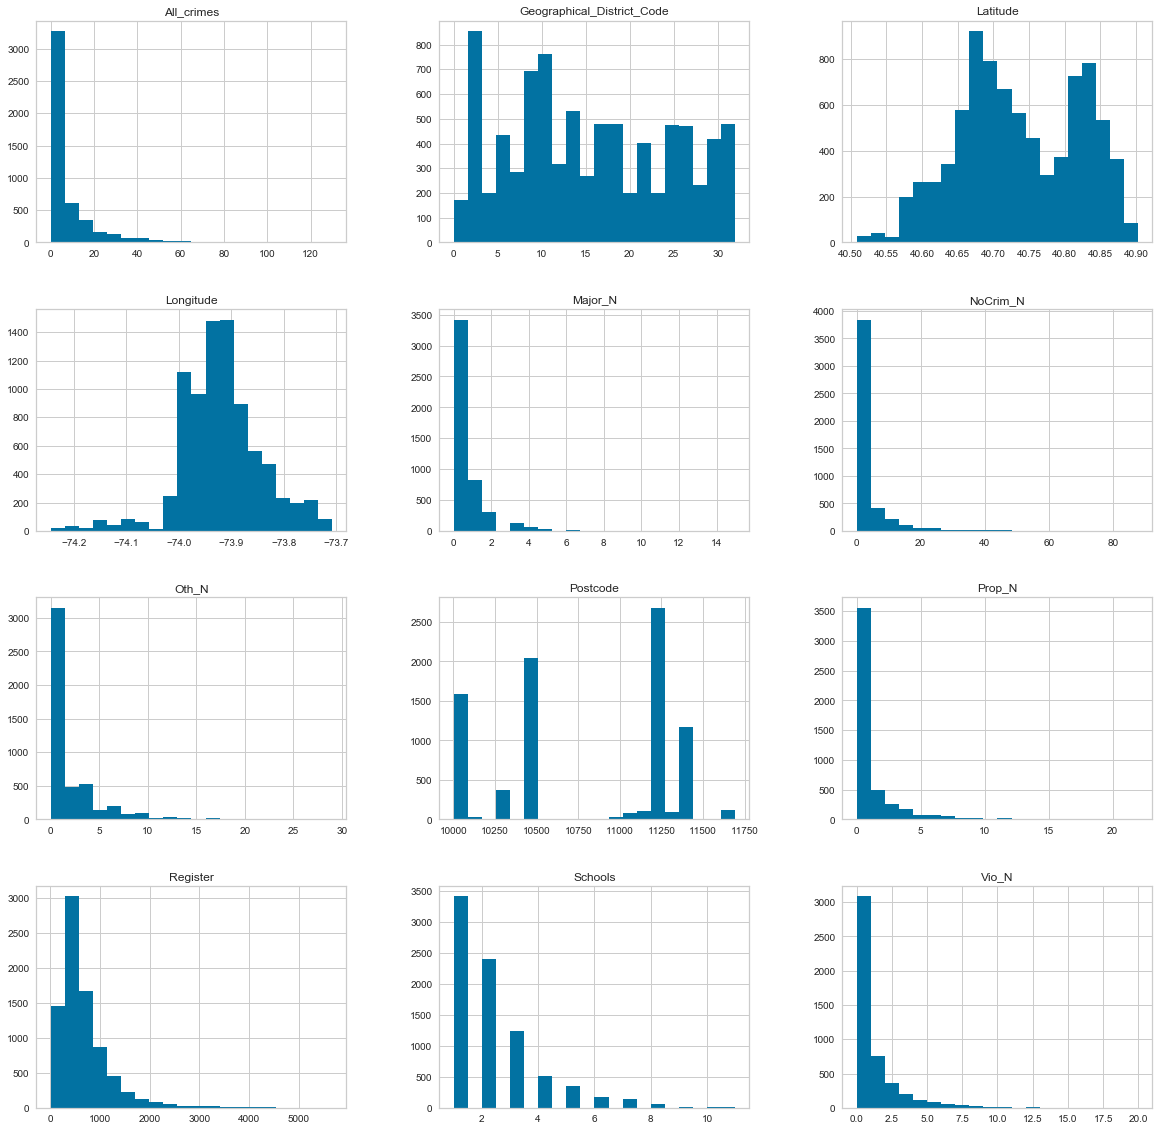

In [18]:
fig = plt.figure(figsize = (20,20))
ax = fig.gca()
df.hist(ax = ax, bins=20)



Plotting histograms to visualize distributions of df3

In [19]:
df3.describe()

,Geographical_District_Code,Register,Schools,Major_N,Oth_N,NoCrim_N,Prop_N,Vio_N,All_crimes
count,1902.000000,1902.000000,1902.000000,1191.000000,1191.000000,1191.000000,1191.00000,1191.000000,1191.000000
mean,15.745531,624.168770,2.073081,0.384551,1.688497,4.136860,0.91016,0.922754,8.042821
std,10.365718,458.952198,1.493954,0.786373,2.674409,8.289038,1.44983,1.722538,13.242179
min,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000
25%,8.000000,320.000000,1.000000,0.000000,0.000000,0.000000,0.00000,0.000000,1.000000
50%,14.500000,488.500000,2.000000,0.000000,1.000000,1.000000,0.00000,0.000000,3.000000
75%,24.000000,804.000000,3.000000,1.000000,2.000000,4.000000,1.00000,1.000000,9.000000
max,85.000000,4547.000000,8.000000,5.000000,23.000000,112.000000,13.00000,12.000000,137.000000


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f8074a0f910>,
      dtype=object)

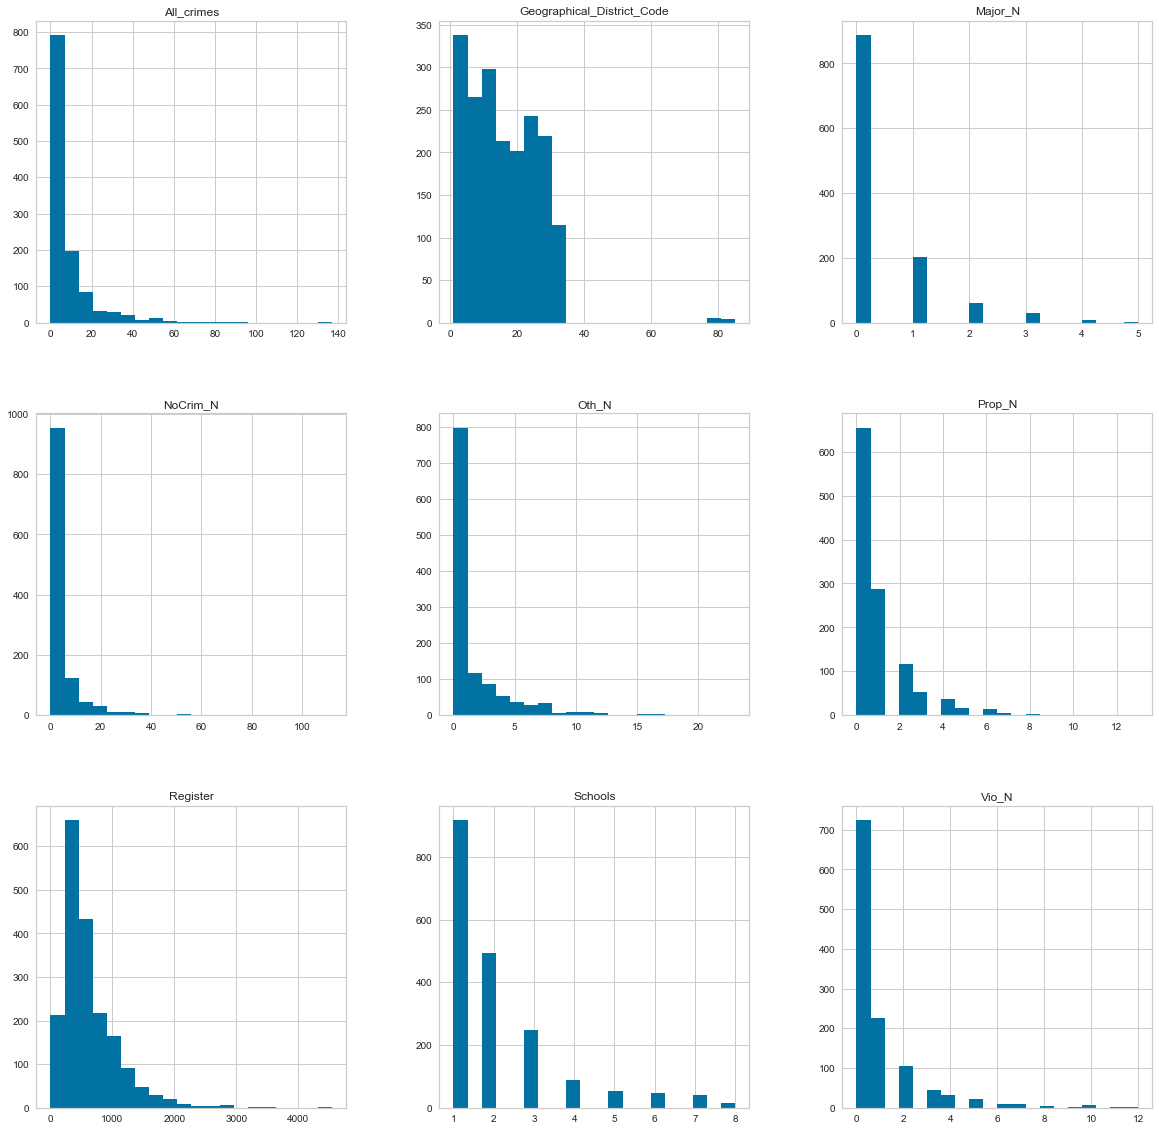

In [20]:
fig = plt.figure(figsize = (20,20))
ax = fig.gca()
df3.hist(ax = ax, bins=20)

Making Bar charts to visualize the distribution of 'Borough'


In [21]:
df['Borough'] = df['Borough'].replace({'K': 'Brooklyn', 'M': 'Manhattan', 'Q': 'Queens', 'R': 'Staten Island', 'X': 'Bronx', 'O': 'Other'})
df3['Borough'] = df3['Borough'].replace({'K': 'Brooklyn', 'M': 'Manhattan', 'Q': 'Queens', 'R': 'Staten Island', 'X': 'Bronx', 'O': 'Other'})






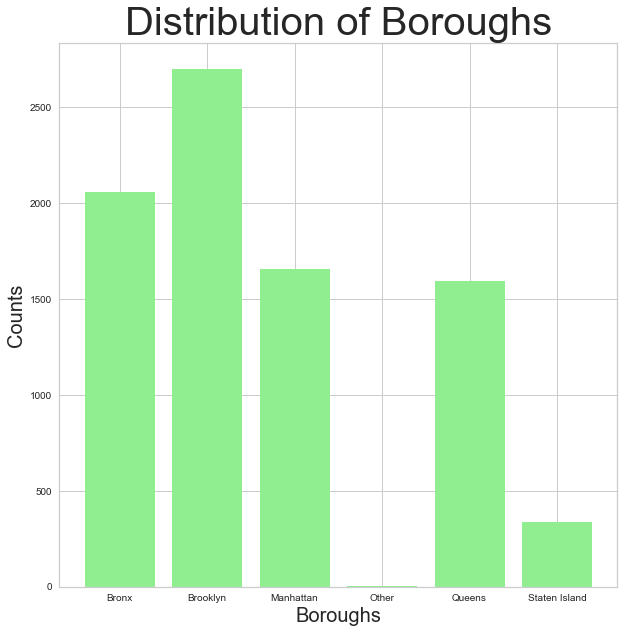

In [22]:
# Distribution of Boroughs of df 

X_Borough = df.groupby('Borough').size().reset_index(name='Counts')['Borough']
Y_Borough = df.groupby('Borough').size().reset_index(name='Counts')['Counts']

plt.rcParams["figure.figsize"] = (10,10)
plt.bar(X_Borough, Y_Borough, color='lightgreen')
plt.title('Distribution of Boroughs', fontsize = 40)
plt.xlabel('Boroughs', fontsize = 20)
plt.ylabel('Counts', fontsize = 20)
plt.rcParams['xtick.labelsize']=30
plt.rcParams['ytick.labelsize']=20
plt.show()

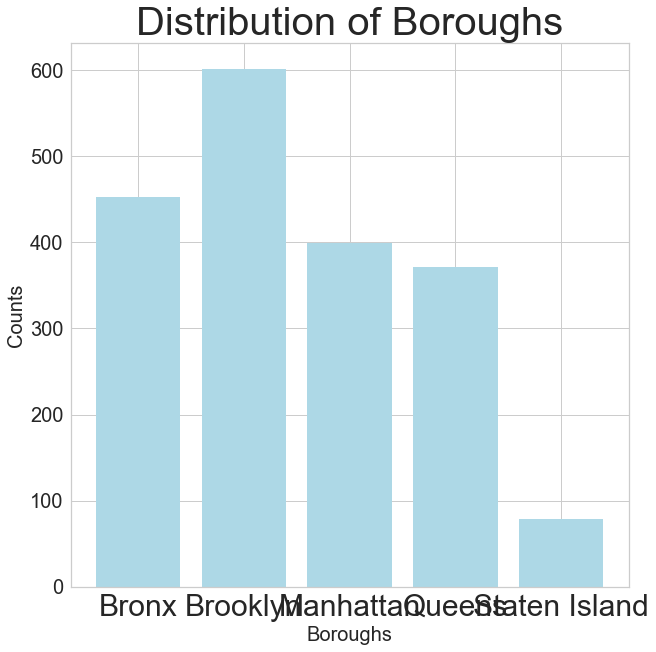

In [23]:
# Distribution of Boroughs of df3

X_Borough = df3.groupby('Borough').size().reset_index(name='Counts')['Borough']
Y_Borough = df3.groupby('Borough').size().reset_index(name='Counts')['Counts']

plt.rcParams["figure.figsize"] = (10,10)
plt.bar(X_Borough, Y_Borough, color='lightblue')
plt.title('Distribution of Boroughs', fontsize = 40)
plt.xlabel('Boroughs', fontsize = 20)
plt.ylabel('Counts', fontsize = 20)
plt.rcParams['xtick.labelsize']=10
plt.rcParams['ytick.labelsize']=20
plt.show()

Bivariate analysis - Visualizing stacked bar plots to compare total number of crimes in each Borough from year 2013-2017

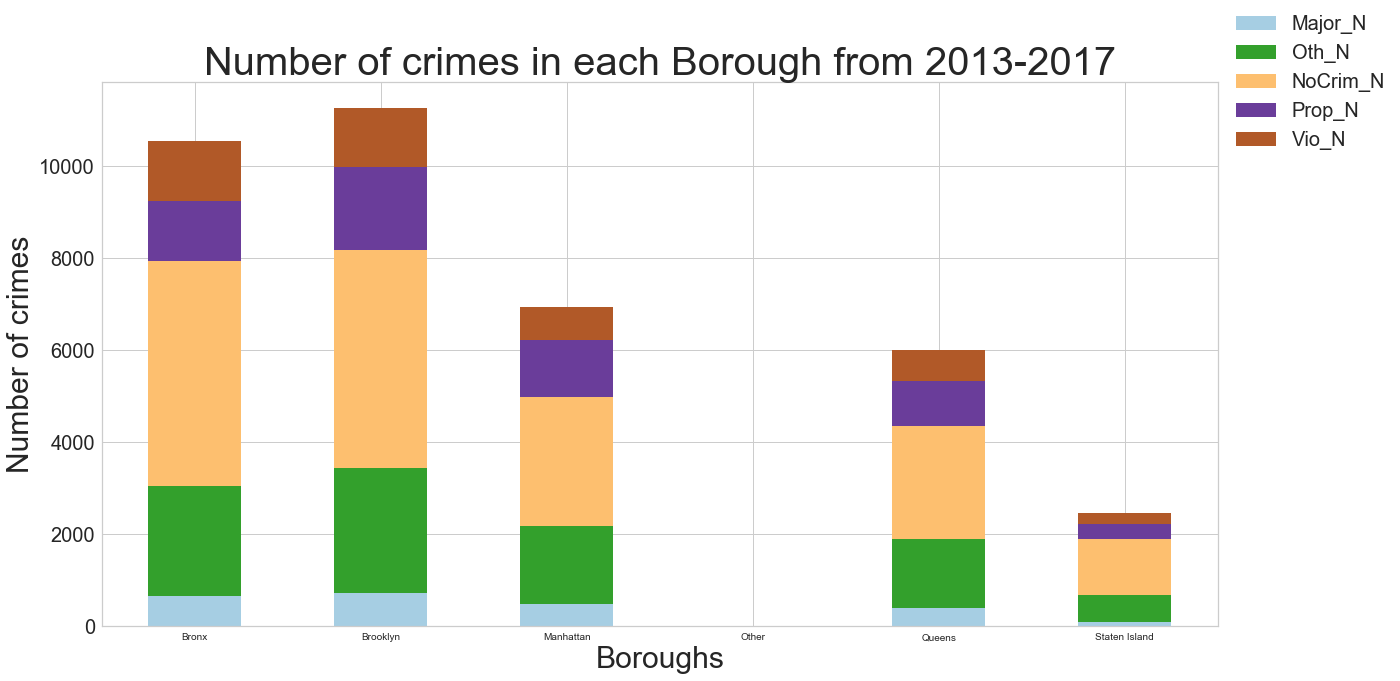

In [24]:
plt.rcParams['figure.figsize'] = (20, 10)

s = df.groupby(['Borough'])['Major_N','Oth_N','NoCrim_N','Prop_N', 'Vio_N' ].aggregate(np.sum)
ax = s.plot(kind='bar', stacked = True, colormap = 'Paired', rot = 0)
plt.legend(loc='center left', bbox_to_anchor=(1.0, 1), prop={'size': 20})
plt.title('Number of crimes in each Borough from 2013-2017', fontsize = 40)
plt.xlabel('Boroughs', fontsize = 30)
plt.ylabel('Number of crimes', fontsize = 30)
plt.rcParams['xtick.labelsize']=40
plt.rcParams['ytick.labelsize']=30
plt.show()

Crimes data by school year

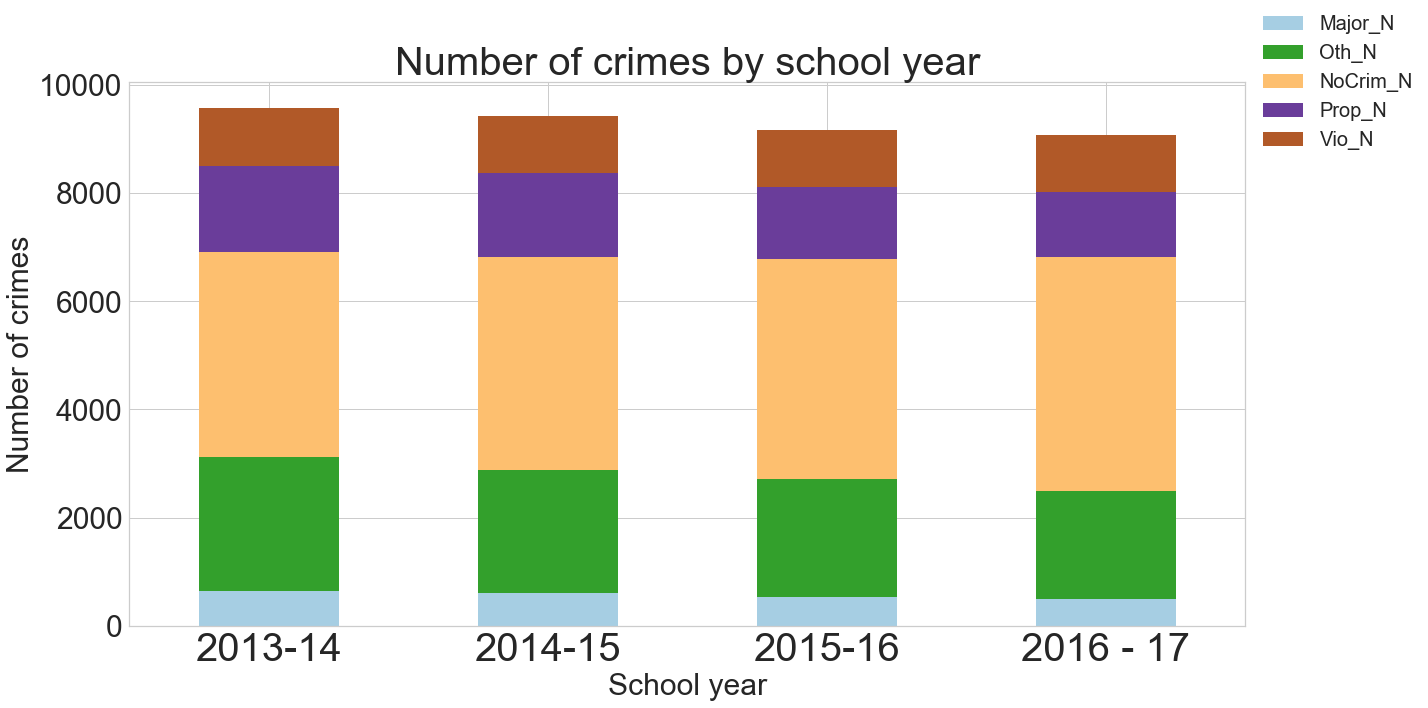

In [25]:
plt.rcParams['figure.figsize'] = (20, 10)

s = df.groupby(['School_Year'])['Major_N','Oth_N','NoCrim_N','Prop_N', 'Vio_N'].aggregate(np.sum)
ax = s.plot(kind='bar', stacked = True, colormap = 'Paired', rot = 0)
#ax2.plot(train['Register'], linestyle='-', marker='o', linewidth=2.0) 
plt.legend(loc='center left', bbox_to_anchor=(1.0, 1), prop={'size': 20})
plt.title('Number of crimes by school year', fontsize = 40)
plt.xlabel('School year', fontsize = 30)
plt.ylabel('Number of crimes', fontsize = 30)
plt.rcParams['xtick.labelsize']=20
plt.rcParams['ytick.labelsize']=30
plt.show()

Plotting the number of crimes each year in comparison to number of students registered each year

No handles with labels found to put in legend.


<Figure size 1440x720 with 0 Axes>

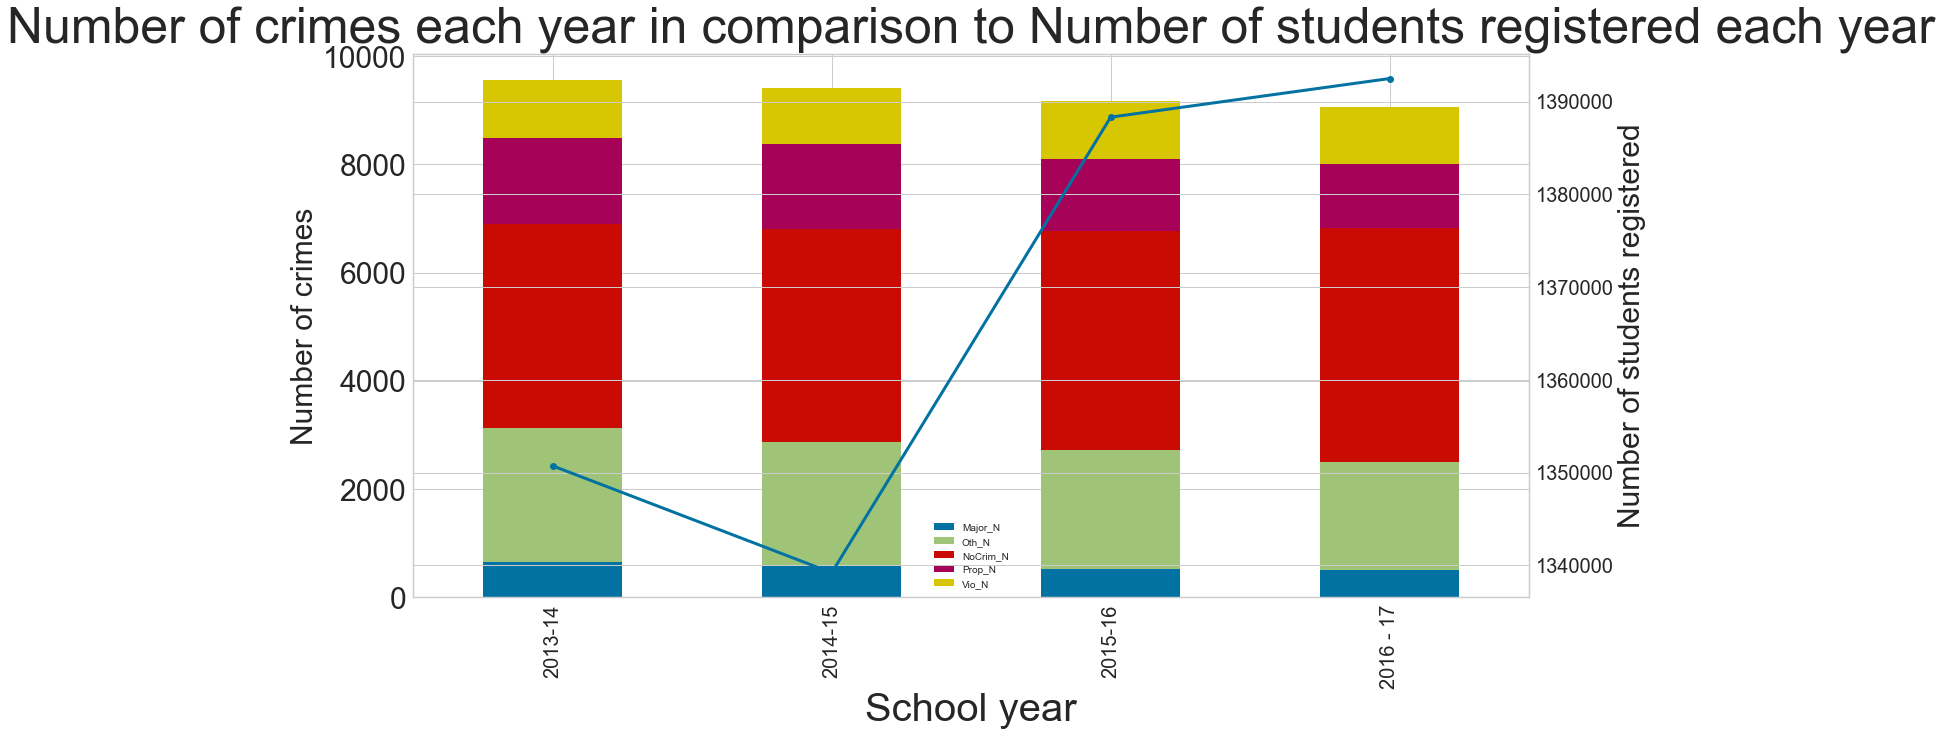

In [26]:
fig = plt.figure()
s = df.groupby(['School_Year'])['Major_N','Oth_N','NoCrim_N','Prop_N', 'Vio_N'].aggregate(np.sum)
r = df.groupby(['School_Year'])['Register'].aggregate(np.sum)


ax = s.plot(kind='bar', stacked = True, use_index=True)
plt.xlabel('School year', fontsize = 40)
plt.ylabel('Number of crimes', fontsize = 30)

plt.title('Number of crimes each year in comparison to Number of students registered each year', fontsize = 50)
plt.rcParams['xtick.labelsize']=20
plt.rcParams['ytick.labelsize']=20
ax2 = ax.twinx()
ax2.plot(r, linestyle='-', marker='o', linewidth=3.0)
plt.legend(loc='center left', bbox_to_anchor=(1.0, 1), prop={'size': 20})
plt.xlabel('School year', fontsize = 40)
plt.ylabel('Number of students registered', fontsize = 30)
plt.show()


Geographical representation of number of crimes by Borough for the year 2013-2017

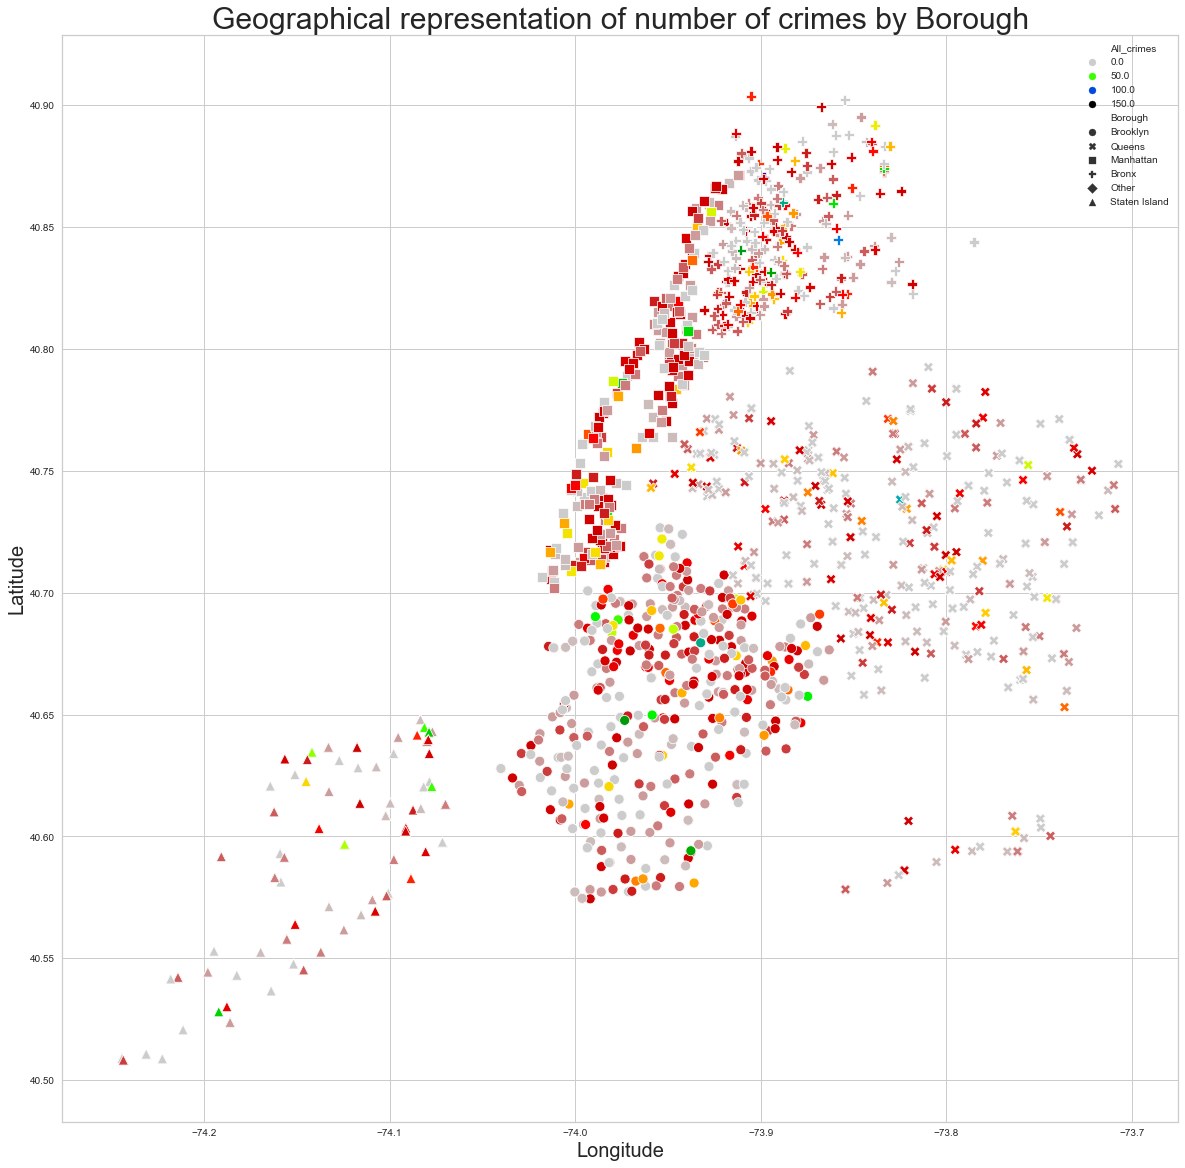

In [27]:

plt.figure(figsize=(20,20))
b = sns.scatterplot(x='Longitude', y='Latitude', hue='All_crimes',s=100, data=df, style="Borough", palette="nipy_spectral_r")
b.axes.set_title("Geographical representation of number of crimes by Borough",fontsize=30)
b.set_xlabel("Longitude",fontsize=20)
b.set_ylabel("Latitude",fontsize=20)
b.tick_params(labelsize=10)
#sns.plt.show()


Bivariate analysis - Visualizing stacked bar plots to compare total number of crimes in each Borough from year 2017-2018

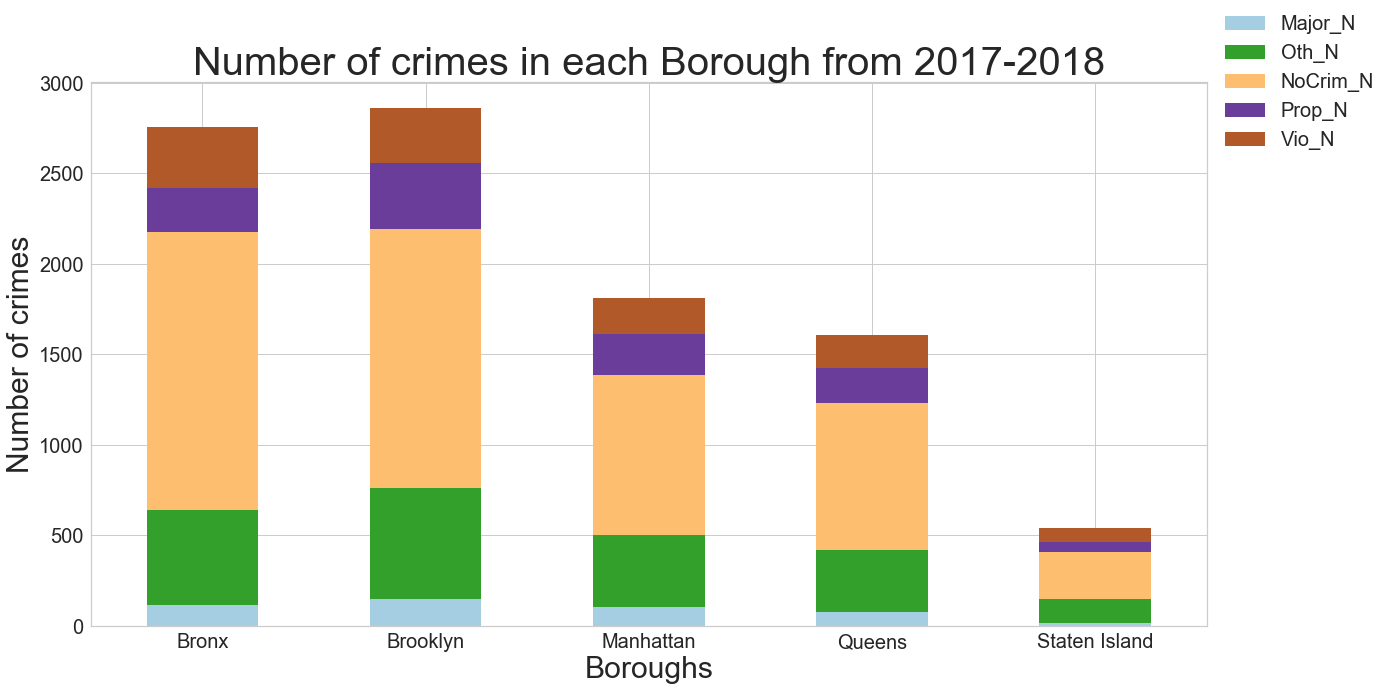

In [28]:
plt.rcParams['figure.figsize'] = (20, 10)

s = df3.groupby(['Borough'])['Major_N','Oth_N','NoCrim_N','Prop_N', 'Vio_N' ].aggregate(np.sum)
ax = s.plot(kind='bar', stacked = True, colormap = 'Paired', rot = 0)
plt.legend(loc='center left', bbox_to_anchor=(1.0, 1), prop={'size': 20})
plt.title('Number of crimes in each Borough from 2017-2018', fontsize = 40)
plt.xlabel('Boroughs', fontsize = 30)
plt.ylabel('Number of crimes', fontsize = 30)
plt.rcParams['xtick.labelsize']=20
plt.rcParams['ytick.labelsize']=30
plt.show()

Crimes data by school year



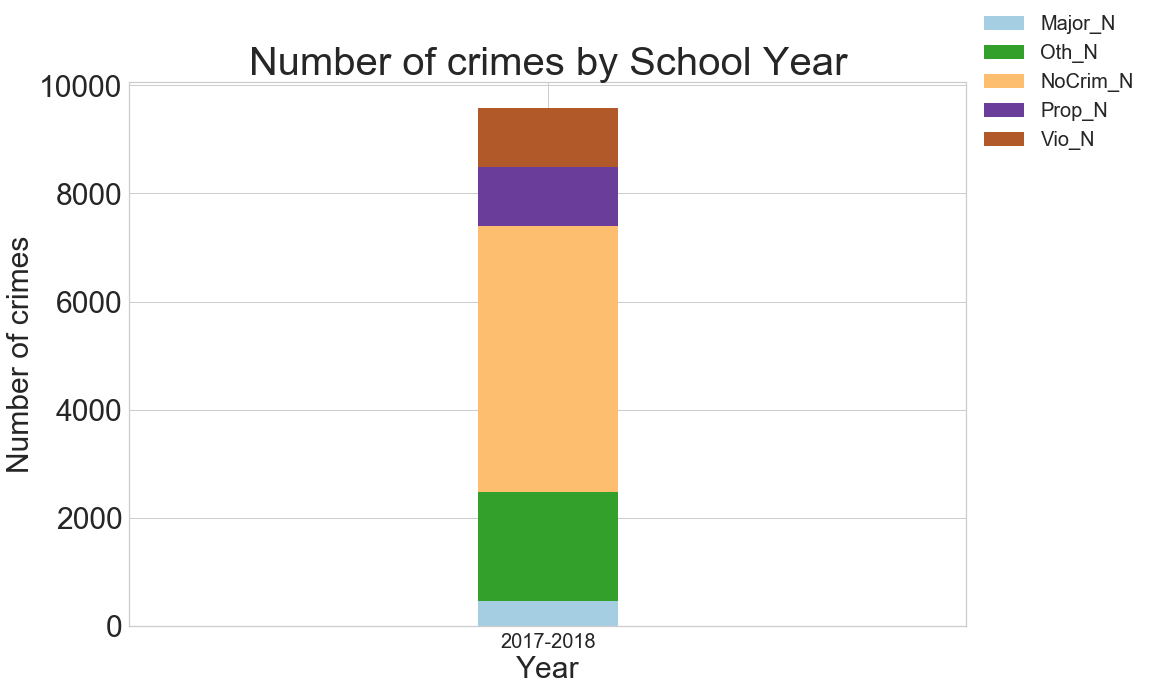

In [29]:
plt.rcParams['figure.figsize'] = (15, 10)

s = df3.groupby(['School_Year'])['Major_N','Oth_N','NoCrim_N','Prop_N', 'Vio_N'].aggregate(np.sum)
ax = s.plot(kind='bar', stacked = True, colormap = 'Paired', rot = 0,width=0.1)
#ax2.plot(train['Register'], linestyle='-', marker='o', linewidth=2.0) 
plt.legend(loc='center left', bbox_to_anchor=(1.0, 1), prop={'size': 20})
plt.title('Number of crimes by School Year', fontsize = 40)
plt.xlabel('Year', fontsize = 30)
plt.ylabel('Number of crimes', fontsize = 30)
plt.rcParams['xtick.labelsize']=20
plt.rcParams['ytick.labelsize']=30
plt.show()

Plotting Number of crimes each year in comparison to Number of students registered each year

No handles with labels found to put in legend.


<Figure size 1080x720 with 0 Axes>

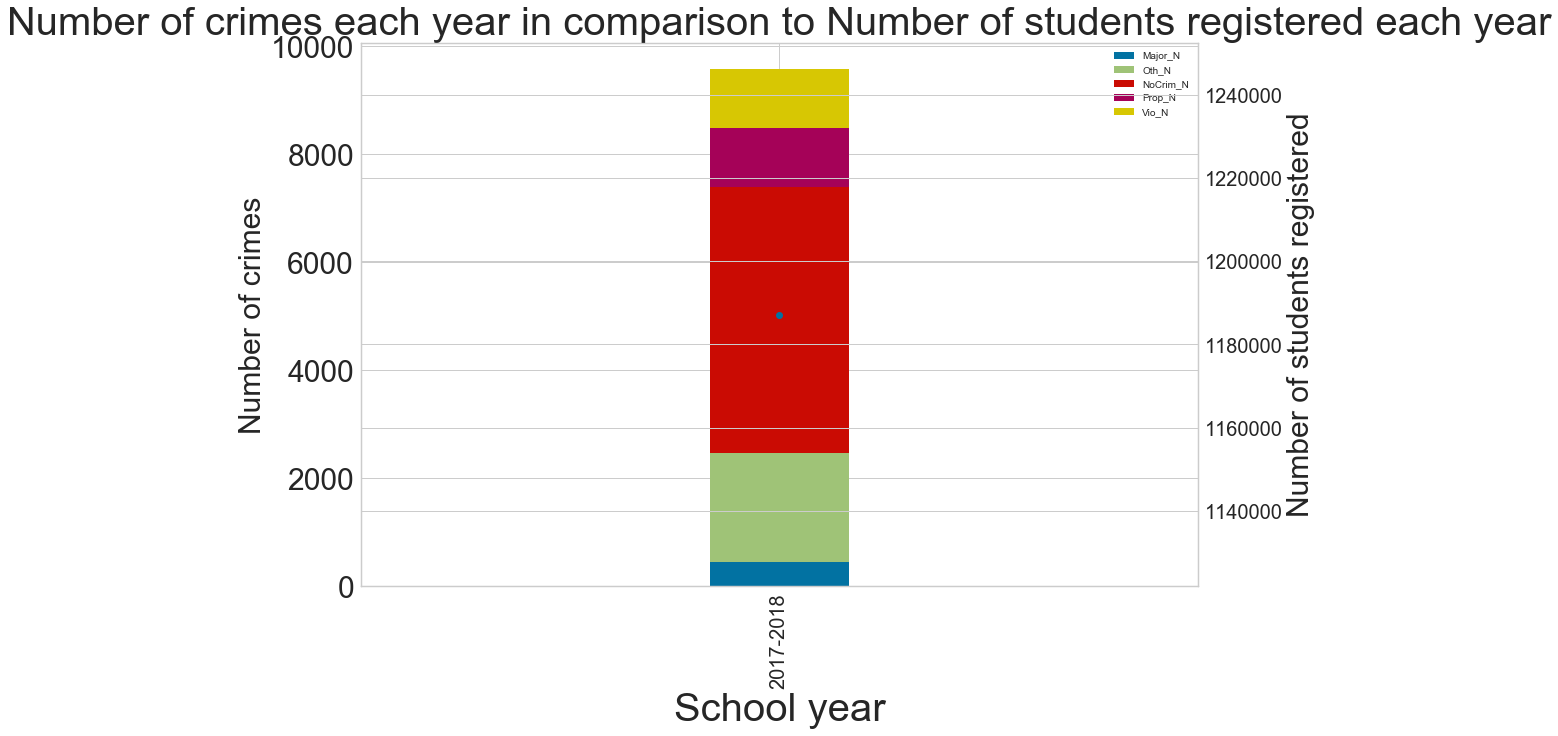

In [30]:
fig = plt.figure()
s = df3.groupby(['School_Year'])['Major_N','Oth_N','NoCrim_N','Prop_N', 'Vio_N'].aggregate(np.sum)
r = df3.groupby(['School_Year'])['Register'].aggregate(np.sum)


ax = s.plot(kind='bar', stacked = True, use_index=True, width=0.1)
plt.xlabel('School year', fontsize = 40)
plt.ylabel('Number of crimes', fontsize = 30)

plt.title('Number of crimes each year in comparison to Number of students registered each year', fontsize = 40)
plt.rcParams['xtick.labelsize']=20
plt.rcParams['ytick.labelsize']=20
ax2 = ax.twinx()
ax2.plot(r,linestyle='-', marker='o', linewidth=50.0)
plt.legend(loc='center left', bbox_to_anchor=(1.0, 1), prop={'size': 20})
plt.xlabel('School year', fontsize = 40)
plt.ylabel('Number of students registered', fontsize = 30)
plt.show()

# correlation

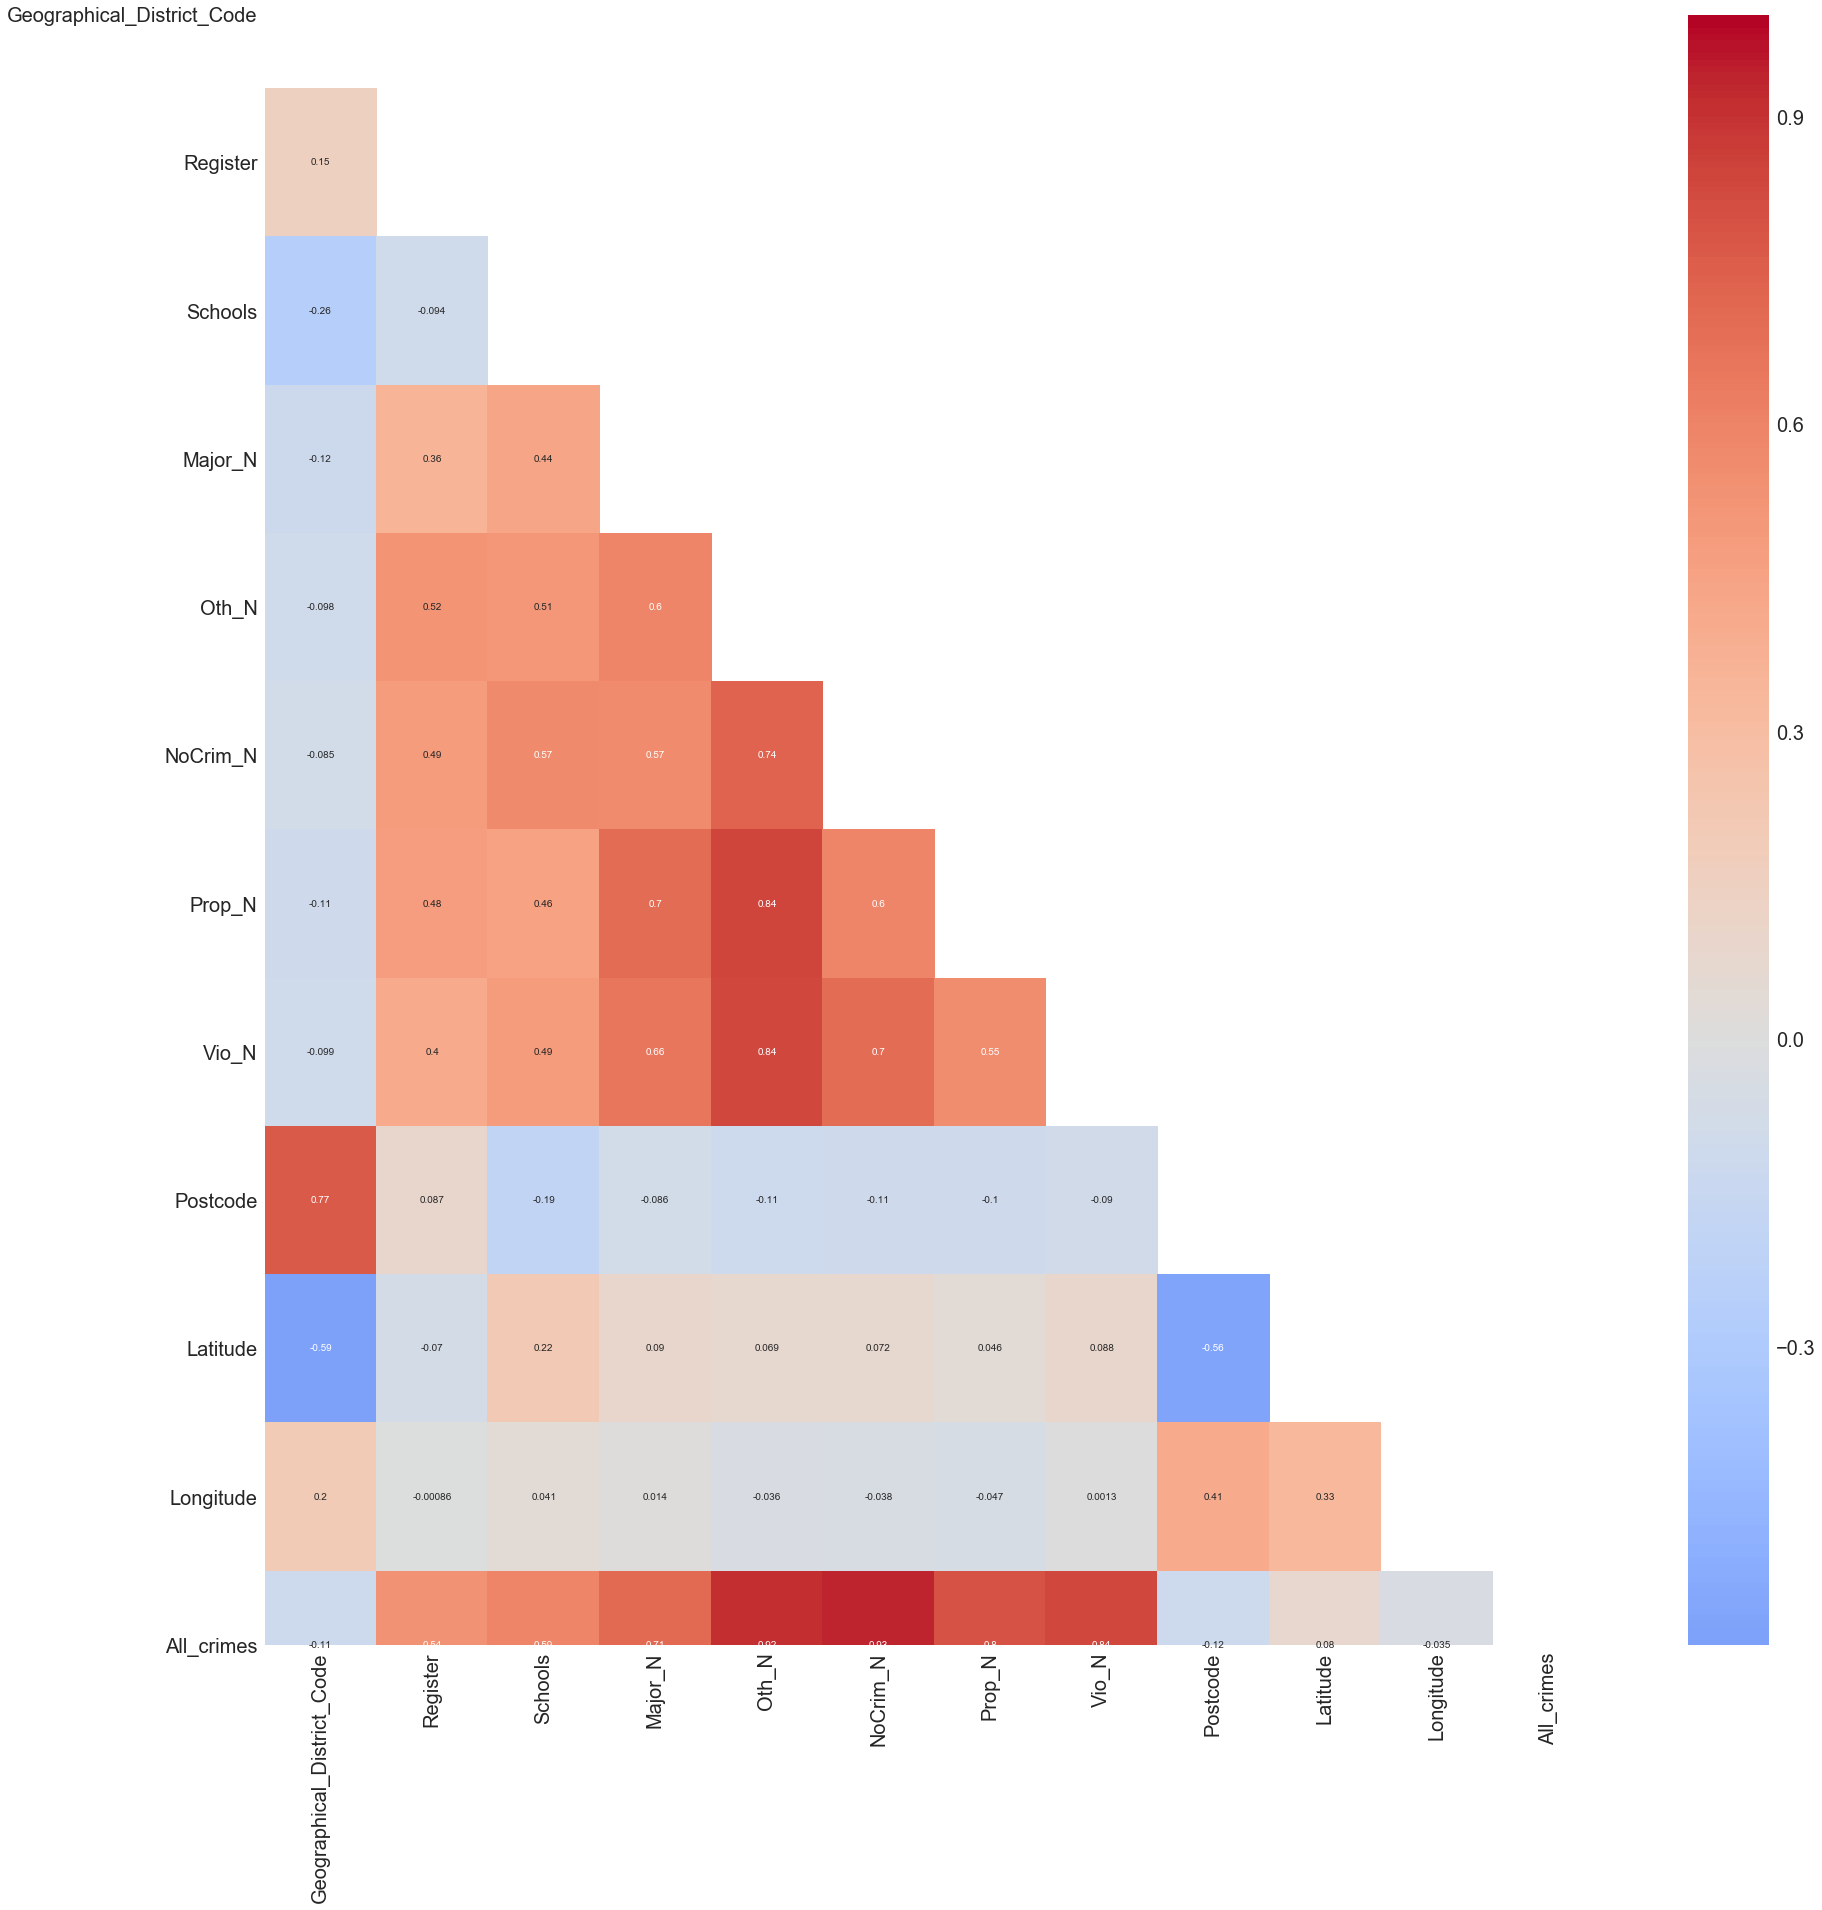

In [31]:
# Plotting a correlation matrix 

matrix = np.triu(df.corr())

plt.figure(figsize=(30,30))
sns.heatmap(df.corr(), center=0, cmap='coolwarm', annot=True, mask=matrix)
#plt.show()

It appears that multiple schools in an area share one building and the data for such group of schools is represented multiple times which makes the data redundant. In this case, I will be deleting some columns that are not relevant before exploratory analysis because, if I keep the redundant data, it will skew the overall observations. So, I will be copying only relevant data of the three files into new dataframes. 

In [32]:
df = df.dropna(axis=0, how='any')
df3 = df3.dropna(axis=0, how='any')


In [33]:
print("Number of Rows in Train dataset ", len(df.axes[0]))
print("Number of Columns in Train dataset: ", len(df.axes[1]))

print("\nNumber of Rows in Dataset 3: ", len(df3.axes[0]))
print("Number of Columns in Dataset 3: ", len(df3.axes[1]))



Number of Rows in Train dataset  4712
Number of Columns in Train dataset:  16

Number of Rows in Dataset 3:  921
Number of Columns in Dataset 3:  13


Seperating the predict and target variables

In [34]:
X = df[['Borough','Register']].copy()
y=df[['All_crimes']].copy()

Getting dummy values for Borough and Register columns

In [35]:
X = pd.get_dummies(X)

y = pd.get_dummies(y)


In [36]:
X

,Register,Borough_Bronx,Borough_Brooklyn,Borough_Manhattan,Borough_Queens,Borough_Staten Island
0,1277.0,0,1,0,0,0
4,876.0,0,1,0,0,0
5,513.0,0,1,0,0,0
6,312.0,0,1,0,0,0
7,714.0,0,1,0,0,0
...,...,...,...,...,...,...
8348,1051.0,0,0,0,1,0
8350,1508.0,0,0,0,1,0
8351,712.0,0,0,0,1,0
8354,334.0,0,0,0,1,0


Splitting test and train sets

In [37]:
from sklearn.model_selection import train_test_split

In [38]:
x_train,x_cv,y_train,y_cv=train_test_split(X,y,test_size=0.3,random_state=1)


# Logistic regression

In [39]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

In [40]:
logistic_model = LogisticRegression(random_state=1)

logistic_model.fit(x_train,y_train)

pred_cv_logistic=logistic_model.predict(x_cv)

score_logistic =accuracy_score(pred_cv_logistic,y_cv)*100 

print("The accuracy score of Logistic model =", score_logistic)



The accuracy score of Logistic model = 23.47949080622348


Preparing the validation dataset

In [41]:
test3 = df3[['Borough','Register']].copy()

In [42]:
test3 = pd.get_dummies(test3)

test3

,Register,Borough_Bronx,Borough_Brooklyn,Borough_Manhattan,Borough_Queens,Borough_Staten Island
0,1151,0,1,0,0,0
5,336,0,1,0,0,0
6,191,0,1,0,0,0
7,681,0,1,0,0,0
8,851,0,1,0,0,0
...,...,...,...,...,...,...
1938,417,1,0,0,0,0
1942,310,1,0,0,0,0
1943,122,1,0,0,0,0
1951,613,1,0,0,0,0


Logistic regression of validation dataset 

In [43]:
pred_test_logistic = logistic_model.predict(test3)


In [44]:
test3_y=df3[['All_crimes']].copy()

In [45]:
tscore_logistic =accuracy_score(pred_test_logistic,test3_y)*100 

print("The accuracy score of validation dataset with Logistic model =", tscore_logistic)

The accuracy score of validation dataset with Logistic model = 24.429967426710096


# Decision tree classifier

In [46]:
from sklearn.tree import DecisionTreeClassifier

In [47]:
tree_model = DecisionTreeClassifier(random_state=1)

tree_model.fit(x_train,y_train)

pred_cv_tree=tree_model.predict(x_cv)

score_tree =accuracy_score(pred_cv_tree,y_cv)*100 
print("The accuracy score of Decision tree classifier =", score_tree)


The accuracy score of Decision tree classifier = 13.861386138613863


In [48]:
pred_test_tree=tree_model.predict(test3)

test_score_tree =accuracy_score(pred_test_tree,test3_y)*100 
print("The accuracy score of validation dataset fitted with Decision tree classifier =", test_score_tree)


The accuracy score of validation dataset fitted with Decision tree classifier = 13.897937024972856


# Random forest classifier

In [49]:
from sklearn.ensemble import RandomForestClassifier


In [50]:
forest_model = RandomForestClassifier(random_state=1,max_depth=10,n_estimators=50)

forest_model.fit(x_train,y_train)

pred_cv_forest=forest_model.predict(x_cv)

score_forest = accuracy_score(pred_cv_forest,y_cv)*100

print("The accuracy score of Random forest classifier =", score_forest)


The accuracy score of Random forest classifier = 19.943422913719942


In [51]:
pred_test_forest=forest_model.predict(test3)

test_score_forest = accuracy_score(pred_test_forest,test3_y)*100

print("The accuracy score of validation dataset fitted with Random forest classifier =", test_score_forest)



The accuracy score of validation dataset fitted with Random forest classifier = 20.412595005428884


In [52]:

print("Logistic regression Train Accuracy :: ", score_logistic)
print("Logistic regression Test Accuracy :: ", tscore_logistic)
    
print("\nDecision tree classifier Train Accuracy :: ", score_tree)
print("Decision tree classifier Test Accuracy :: ", test_score_tree)

print("\nRandom forest classifier Train Accuracy :: ", score_forest)
print("Random forest classifier Test Accuracy :: ", test_score_forest)
 

Logistic regression Train Accuracy ::  23.47949080622348
Logistic regression Test Accuracy ::  24.429967426710096

Decision tree classifier Train Accuracy ::  13.861386138613863
Decision tree classifier Test Accuracy ::  13.897937024972856

Random forest classifier Train Accuracy ::  19.943422913719942
Random forest classifier Test Accuracy ::  20.412595005428884
